# **Entrainement sur la competition kaggle le TITANIC **

---


https://www.kaggle.com/competitions/titanic/data

In [83]:
# import des packages
import inspect
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt


In [84]:
df=pd.read_csv('/content/sample_data/train.csv')
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [85]:
# pour avoir les info sur le dataframe:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [86]:
#lecture des valeurs nulles sur le dataframe
# le sum permet de faire une synthése du résultats
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<Axes: >

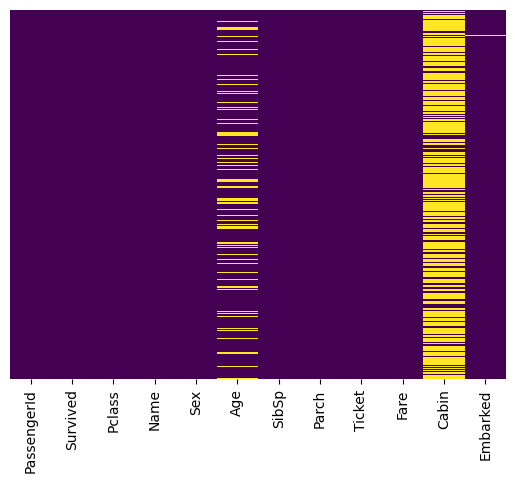

In [87]:
#on peut aussi visualiser les erreurs avec heatmap, en jaune on voit les erreurs dues aux variables manquantes
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [88]:
#on va traiter la colonne Age avec les valeur manquante
df.shape
# on affiche avec le .shape toutes les valeurs nulles mais si on fait cela on voit qu'il ne reste que 183 lgnie
# df.dropna(how='any').shape
# si on veut supprimer vraiment on rajoute le inplace=true
# df.dropna(how='any',inplace=False)
# pour supprimer uniquement sur la colonne age
# df.dropna(how='any',subset=['Age'],  inplace=False).shape


(891, 12)

In [89]:
# on affiche avec le .shape toutes les valeurs nulles mais si on fait cela on voit qu'il ne reste que 183 lgnie
df.dropna(how='any').shape
# si on veut supprimer vraiment on rajoute le inplace=true
# df.dropna(how='any',inplace=False)
# # pour supprimer uniquement sur la colonne age
# df.dropna(how='any',subset=['Age'],  inplace=False).shape

(183, 12)

In [90]:
# si on veut supprimer vraiment on rajoute le inplace=true
df.dropna(how='any',inplace=False)
# pour supprimer uniquement sur la colonne age
# df.dropna(how='any',subset=['Age'], inplace=False).shape

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S
...,...,...,...,...,...,...,...,...,...,...,...,...
871,872,1,1,"Beckwith, Mrs. Richard Leonard (Sallie Monypeny)",female,47.0,1,1,11751,52.5542,D35,S
872,873,0,1,"Carlsson, Mr. Frans Olof",male,33.0,0,0,695,5.0000,B51 B53 B55,S
879,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0,0,1,11767,83.1583,C50,C
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S


In [91]:
# si on veut supprimer vraiment on rajoute le inplace=true
# df.dropna(how='any',inplace=False)
# pour supprimer uniquement sur la colonne age
df.dropna(how='any',subset=['Age'],  inplace=False).shape

(714, 12)

In [92]:
# pour remplacer les valeurs manquantes de l'age on peut faire le choix de prendre la valeur medianes ou moyenne des ages ici=28
df['Age'].median()
# pour calucler la moyenne
df['Age'].mean()

# creation d'un filtre sur la mediane de la colonne age pour simplifier le code
filtre_age_median=df['Age'].median()
filtre_age_mean=df['Age'].mean()
# on peut remplacer par fillna
df['Age'].fillna(filtre_age_median, inplace=True)

In [93]:
df.shape

(891, 12)

<Axes: >

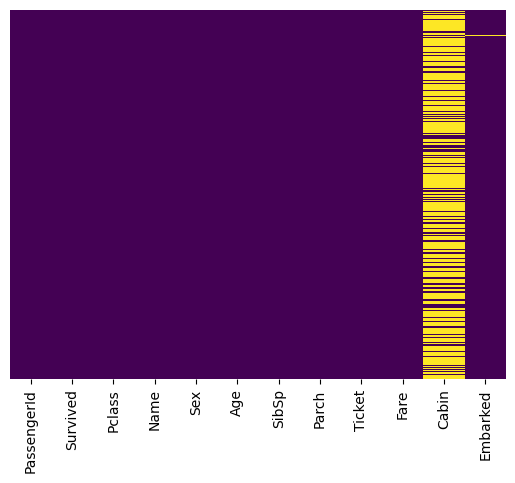

In [94]:
# on peut retester sur le graphe on aprecoit que la colonne age est propre
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis')


In [95]:
# on va maintenant traiter la colonne des noms de cabines
# calcul du nombre de valeur
df['Cabin'].value_counts()

B96 B98        4
G6             4
C23 C25 C27    4
C22 C26        3
F33            3
              ..
E34            1
C7             1
C54            1
E36            1
C148           1
Name: Cabin, Length: 147, dtype: int64

In [96]:
# on pourrait rempalcer les noms manquant par 'no cabin number'
df['Cabin'].fillna(value='No cabin number', inplace=False).shape
# comme on le voit cela impacte 891 ligne c'est donc trop important

(891,)

In [97]:
# par secu on va travailler sur une autre pd.DataFrame
df2=pd.read_csv('/content/sample_data/train.csv')

In [98]:
from matplotlib import rc_file_defaults
# on utilise la methode bfill (back fill ) pour remplacer les vides par la cellule suivante
df2['Cabin'].fillna(method='bfill', inplace=True)

# pour remplacer de bas en haut on utilise ffill
df2['Cabin'].fillna(method='bfill', inplace=True)

<Axes: >

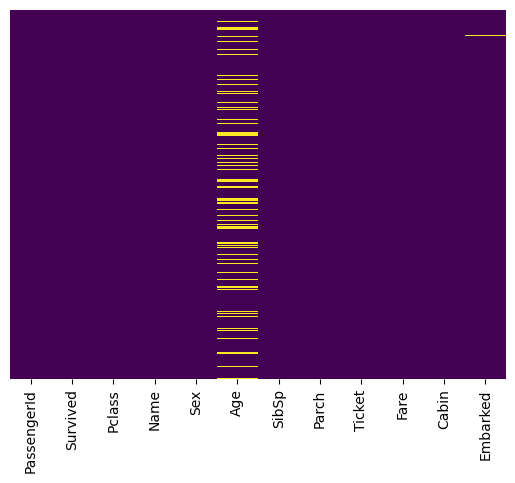

In [99]:
# on peut retester sur le graphe on aprecoit que la colonne age est propre
sns.heatmap(df2.isnull(), yticklabels=False, cbar=False, cmap='viridis')

<Axes: xlabel='Age'>

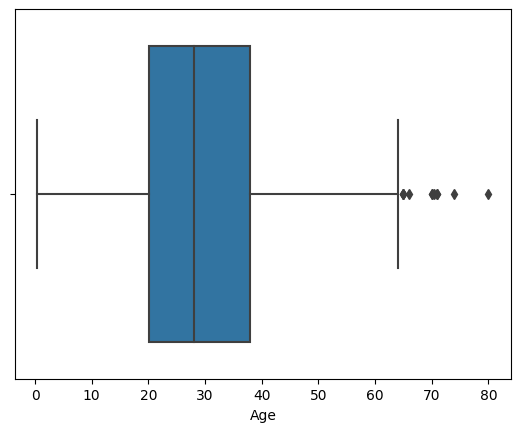

In [100]:
# on peut aussi faire une analyse de données incoherente avec le graphique à moustache
# avec la fonction analytique boxplot basée sur les valeurs des quartiles
sns.boxplot(x=df2['Age'])
# on voit sur la droite quelles valeurs aberrantes vers les 65 ans



In [101]:
# pour affiner la recherche on estime à 5 % de valeurs aberrantes
# on fait unfiltre colonne
filtre_colonne=df2['Age']
# on prend upper pour specifier que l'on prend les valeurs qui son superieures
upper_lim=filtre_colonne.quantile(.95)
df2_outliers=df2[filtre_colonne>upper_lim]
df2_outliers.shape
# sns.boxplot(x=df2['Age'])

(35, 12)

In [102]:
from numpy.ma.core import fromfunction
from ipywidgets.widgets.widget_string import TypedTuple
# autre méthode avec le Z-score, on va soustraire la moyenne à
#  chaque entrée divisée par l'ecart type
# tableau des listes aberrantes
outliers=[]
def detect_outliers(data):
  # parametre choisi de maniére arbitraire, represente l'écart,
  # c'est la valeur à partir de laquelle on considére la valeur aberrante
  threshold=3
  # moyenne
  mean=np.mean(data)
  # ecart Type
  std=np.std(data)

  for i in data:
    # z-score on calcule l'écart entre la valeur et la moyenne des valeur le tout divisé par l'ecart type
     z_score=(i-mean)/std
    #  on teste si la valeur absolue du Z_score est supérieur à la valeur delimitant les valeurs aberrantes
     if np.abs(z_score)>threshold:
      # on rajoute la valeur au tableau des outliers
      outliers.append(i)
      return outliers

# test de la function sur la colonne filtrée
detect_outliers(filtre_colonne)
# outliers

[80.0]

In [103]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        890 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


#texte en gras Pour aller plus loin avec le data set :weight-height-bmi

In [104]:
df3=pd.read_csv('/content/sample_data/weight-height-bmi.csv')
filtre_colonne=['Gender']
df3.head(10)

,Gender,Height,Weight,BMI
0,Male,1.875714,109.720985,Obesity
1,Male,1.747060,73.622732,Normal
2,Male,1.882397,96.497550,Overweight
3,Male,1.821967,99.809504,Obesity
4,Male,1.774998,93.598619,Overweight
5,Male,1.708227,69.042216,Normal
6,Male,1.747141,83.428219,Overweight
7,Male,1.736052,76.190352,Overweight
8,Male,1.702281,79.800187,Overweight
9,Male,1.611795,70.941642,Overweight


In [105]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Gender  10000 non-null  object 
 1   Height  10000 non-null  float64
 2   Weight  10000 non-null  float64
 3   BMI     10000 non-null  object 
dtypes: float64(2), object(2)
memory usage: 312.6+ KB


In [106]:
df3['Gender'].value_counts()

Male      5000
Female    5000
Name: Gender, dtype: int64

In [107]:
df3['BMI'].value_counts()

Overweight     5589
Normal         4114
Obesity         255
Underweight      42
Name: BMI, dtype: int64

In [108]:
df3['Height'].value_counts()

1.875714    1
1.447168    1
1.682371    1
1.653746    1
1.670549    1
           ..
1.622385    1
1.619882    1
1.837998    1
1.788317    1
1.573384    1
Name: Height, Length: 10000, dtype: int64

In [109]:
df3['Weight'].value_counts()

109.720985    1
40.446731     1
65.869350     1
71.479041     1
69.255858     1
             ..
69.197555     1
72.859546     1
94.072636     1
91.100436     1
51.550324     1
Name: Weight, Length: 10000, dtype: int64

In [110]:
# savoir si la variable est qualitative ou quantitative
# qualitatif =gender
# fonction filtre filtre_colonne=['Gender']
def filtre_colonne(colonne):
  return df3[colonne]
filtre_colonne('Gender')

0         Male
1         Male
2         Male
3         Male
4         Male
         ...  
9995    Female
9996    Female
9997    Female
9998    Female
9999    Female
Name: Gender, Length: 10000, dtype: object

In [111]:
# Cette fonction parcourt les variables locales dans la frame précédente
#  (celle qui a appelé la fonction get_df_name)
# et retourne le nom de la variable qui correspond au DataFrame passé en argument.
def get_df_name(df):
    callers_local_vars = inspect.currentframe().f_back.f_locals.items()
    return [var_name for var_name, var_val in callers_local_vars if var_val is df]

# Création d'un DataFrame pour tester la fonction
df_test = pd.DataFrame({'A': [1, 2, 3], 'B': [4, 5, 6]})

# Utilisation de la fonction pour obtenir le nom du DataFrame
print(get_df_name(df_test))

['df_test']


In [112]:
# fonction permettant d'avoir la liste des colonnes d'un dataframe
def get_column_names(df):
    return df.columns.tolist()

In [113]:
#pour la liste compléte
get_column_names(df3)

['Gender', 'Height', 'Weight', 'BMI']

In [114]:
# pour cibler la premiere colonne
get_column_names(df3)[0]

'Gender'

In [115]:
# calul des moyennes des colonnes numeriques et le nombre de valeur des colonnes string
def mean_of_colonnes(df):
  # df.info()
  list_mean_col=[]
  for col in get_column_names(df):
    # print(col)
    # si les valeurs de la colonne sont numeriques on fait la moyenne,
    # sinon on compte les différents type qualitatifs
    if pd.api.types.is_numeric_dtype(df[col]):
      mean_col=df[col].mean()
    else:
      mean_col=df[col].value_counts()
    list_mean_col.append(mean_col)

  return list_mean_col

mean_of_colonnes(df3)

[Male      5000
 Female    5000
 Name: Gender, dtype: int64,
 1.6857360177711003,
 73.22805433651601,
 Overweight     5589
 Normal         4114
 Obesity         255
 Underweight      42
 Name: BMI, dtype: int64]

In [116]:
df3['Gender'].value_counts()

Male      5000
Female    5000
Name: Gender, dtype: int64

<Axes: >

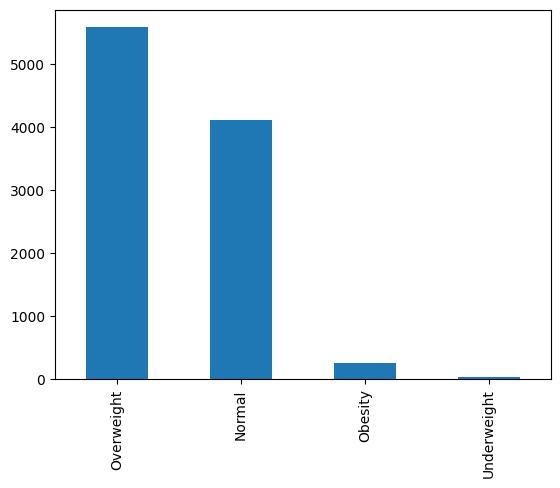

In [117]:
df3['BMI'].value_counts().plot(kind='bar')

VARIABLES **QUANTITATIVE**

In [118]:
col='Height'
round(df3[col].mean(),2)


1.69

In [119]:
df3[col].max()


2.006568056

In [120]:
df3[col].min()


1.378283586

In [121]:
df3[col].median()


1.6844789800000002

In [122]:
df3[col].std()

0.0977272142677529

<Axes: ylabel='Frequency'>

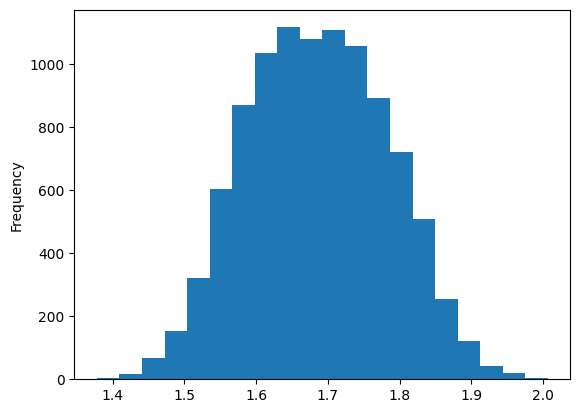

In [123]:
df3[col].plot.hist(bins=20)

<Axes: >

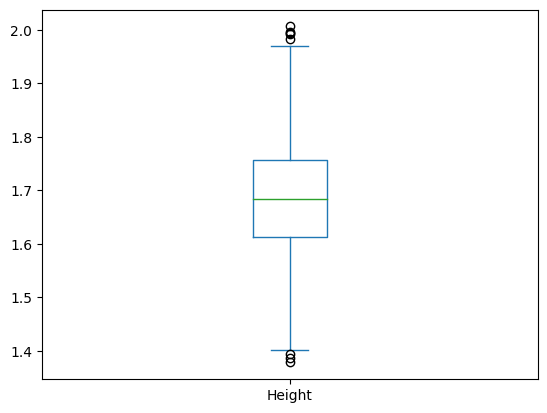

In [124]:
# sur le graphe on voit qques outliers en haut et en bas
df3[col].plot.box()

**CALCUL DES VALEURS ABBERANTES  (OUTLIERS)**

---



In [125]:
# calcul des quartiles, pou rappel Q2 c'est la moyenne
Q1=df3[col].quantile(0.25)
Q3=df3[col].quantile(0.75)
IQR=Q3-Q1
coef=IQR*1.5
col, Q1 , Q3, IQR, coef

('Height',
 1.61304276,
 1.7570262479999998,
 0.14398348799999994,
 0.2159752319999999)

In [126]:
# calcul des valeurs limite
limite_inferieure=Q1-coef
limite_superieur=Q3 + coef
limite_inferieure,  limite_superieur

(1.397067528, 1.9730014799999998)

In [127]:
# on cherche les outliers donc les valeurs qui sont
# tout en bas et tout en haut sur le graphe box
#  on voit que la limte basse est au alentour des
#  1.4 et la limite haute vers les 1.95
col='Height'
filtre_col=df3[col]

result=df3[(filtre_col > limite_superieur) | (filtre_col < limite_inferieure)]
result

,Gender,Height,Weight,BMI
994,Male,1.983635,115.979317,Overweight
1317,Male,1.992936,103.120769,Overweight
2014,Male,2.006568,122.465167,Obesity
3285,Male,1.994617,115.162021,Overweight
3757,Male,1.996983,111.462878,Overweight
6624,Female,1.387268,32.383633,Underweight
7294,Female,1.393793,35.655357,Underweight
9285,Female,1.378284,29.347460,Underweight


In [128]:
# filtre colonnes
result.sort_values(col)

,Gender,Height,Weight,BMI
9285,Female,1.378284,29.347460,Underweight
6624,Female,1.387268,32.383633,Underweight
7294,Female,1.393793,35.655357,Underweight
994,Male,1.983635,115.979317,Overweight
1317,Male,1.992936,103.120769,Overweight
3285,Male,1.994617,115.162021,Overweight
3757,Male,1.996983,111.462878,Overweight
2014,Male,2.006568,122.465167,Obesity


In [129]:
# on limite les données abberrantes
df3=df3[(filtre_col <= limite_superieur) & (filtre_col >= limite_inferieure) ]
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9992 entries, 0 to 9999
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Gender  9992 non-null   object 
 1   Height  9992 non-null   float64
 2   Weight  9992 non-null   float64
 3   BMI     9992 non-null   object 
dtypes: float64(2), object(2)
memory usage: 390.3+ KB


<Axes: >

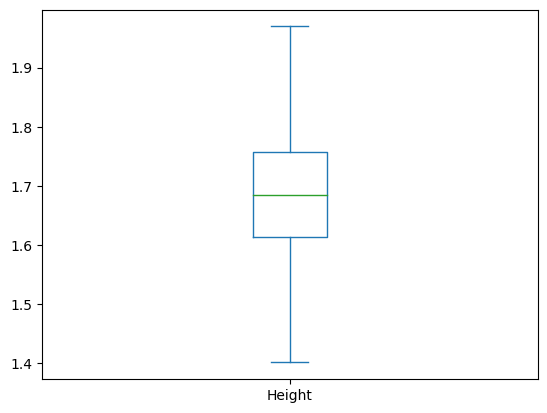

In [130]:
# on constate bien qu'aprés nettoage il n'y a plus de valeurs abberrantes
df3[col].plot.box()

<Axes: ylabel='Frequency'>

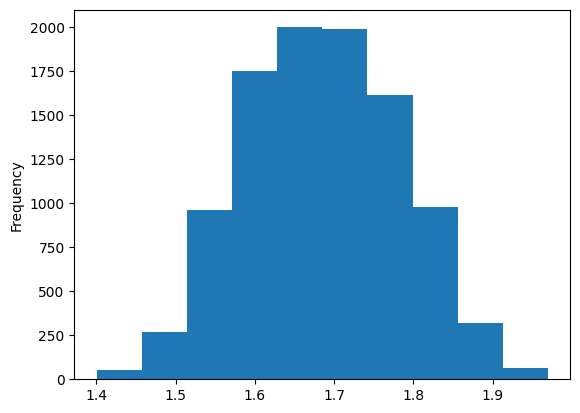

In [131]:
df3[col].plot.hist()

<Axes: ylabel='Frequency'>

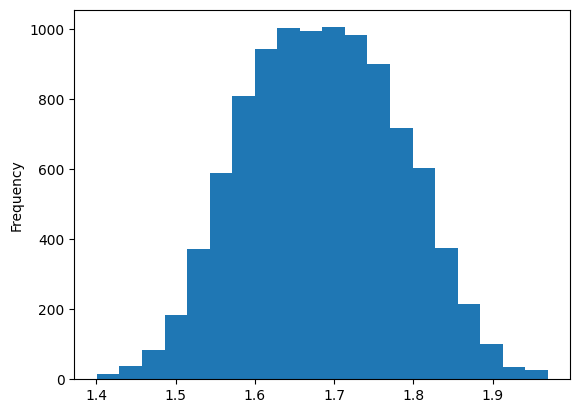

In [132]:
df3[col].plot.hist(bins=20)

<Axes: ylabel='Frequency'>

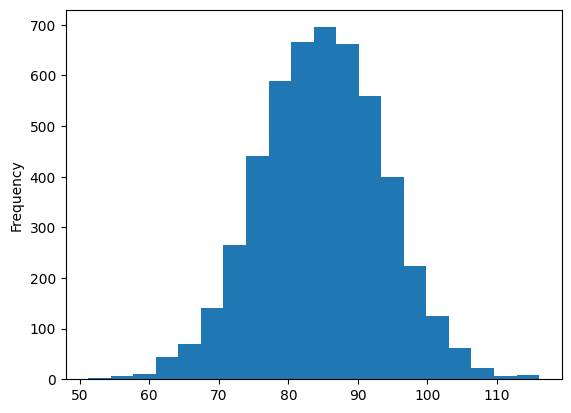

In [143]:
col='Gender'
col2='Weight'
filtre_col=df3[col]
val='Male'
filtre_sexe=df3[filtre_col==val]
filtre_sexe[col2].plot.hist(bins=20)
